In [1]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets

In [2]:
data_folder = './FMNIST_dataset'

In [3]:
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

In [4]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [57]:
tr_images.shape

torch.Size([60000, 28, 28])

In [5]:
type(tr_images), tr_targets.shape

(torch.Tensor, torch.Size([60000]))

In [45]:
class FMNIST_Dataset():
    def __init__(self, x, y):
        x = x.float()
        self.x = x.view(-1, 28*28)
        self.y = y.float()
        
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x, y
    
    def __len__(self):
        return len(self.x)

In [46]:
def get_data():
    train = FMNIST_Dataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    return trn_dl

In [47]:
from torch.optim import SGD

def get_model():
    model = nn.Sequential(
        nn.Linear(784, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    )
    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr= 1e-2)
    return model, loss_fn, optimizer

In [52]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    
    batch_loss = loss_fn(prediction, y.long())
    batch_loss.backward()
    
    opt.step()
    opt.zero_grad()
    
    return batch_loss.item()

In [49]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    
    prediction = model(x)
    
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [50]:
trn_dl = get_data()
model, loss_fn, optimizer = get_model()

In [54]:
losses, accuracies = [], []

for epoch in range(5):
    print(epoch)
    epoch_losses, epoch_accuracies = [], []
    
    for batch in trn_dl:
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        epoch_losses.append(batch_loss)
    epoch_loss = np.array(epoch_losses).mean()
    
    for batch in trn_dl:
        x, y = batch
        is_correct = accuracy(x, y, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)
    
print(losses)
print(accuracies)

0
1
2
3
4
[2.2277169048309324, 2.2184453994750974, 2.216859313074748, 2.1685963426589967, 2.1513879082361855]
[0.15776666666666667, 0.12748333333333334, 0.13921666666666666, 0.1621, 0.16865]


<ipython-input-55-07f3345cba83>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


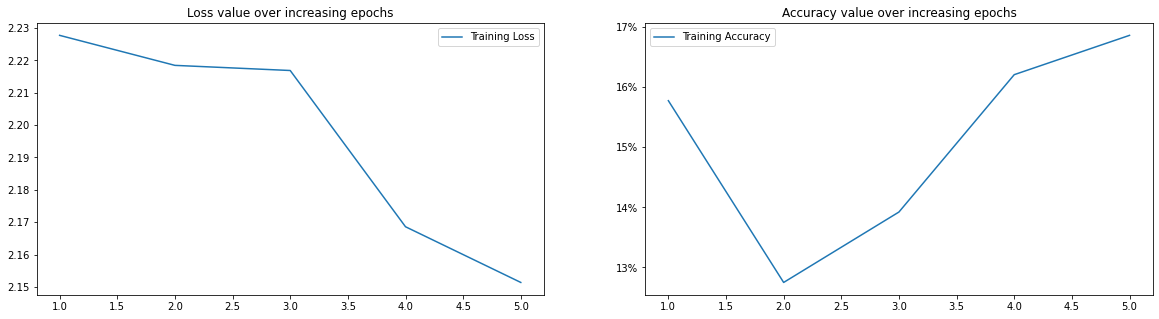

In [55]:
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()